In [2]:
url  = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [7]:
from urllib.request import urlretrieve
import pandas as pd

In [9]:
urlretrieve(url,'freemont.csv')

('freemont.csv', <http.client.HTTPMessage at 0x1fa9eb312b0>)

In [13]:
df = pd.read_csv('freemont.csv', index_col='Date', parse_dates=True)
df.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


<IPython.core.display.Javascript object>


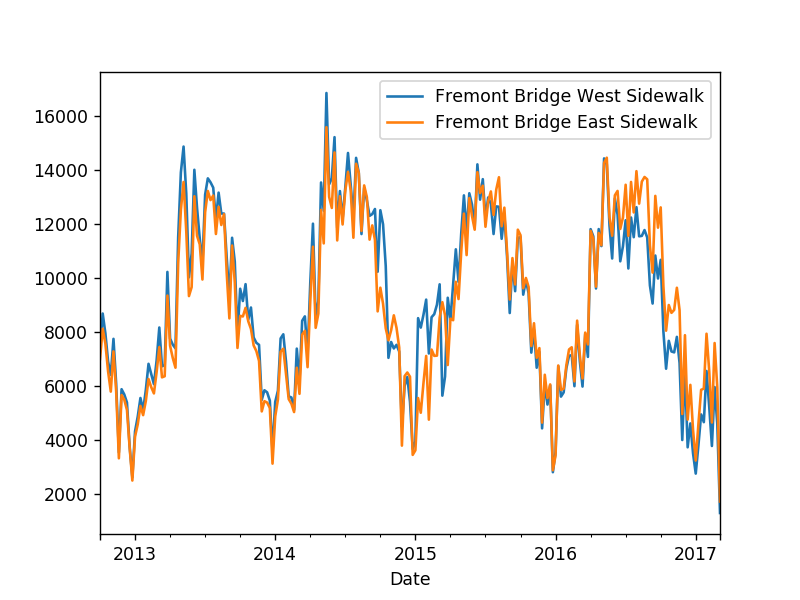

In [14]:
%matplotlib notebook
df.resample('w').sum().plot()

<IPython.core.display.Javascript object>


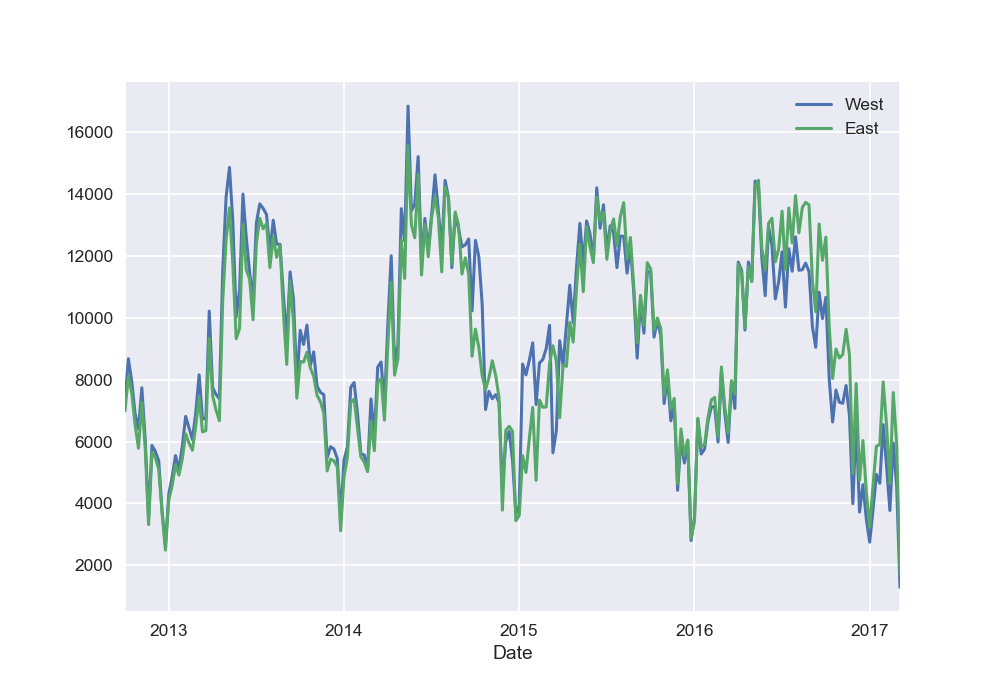

In [17]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
df.columns= ['West','East']
df.resample('w').sum().plot()

<IPython.core.display.Javascript object>


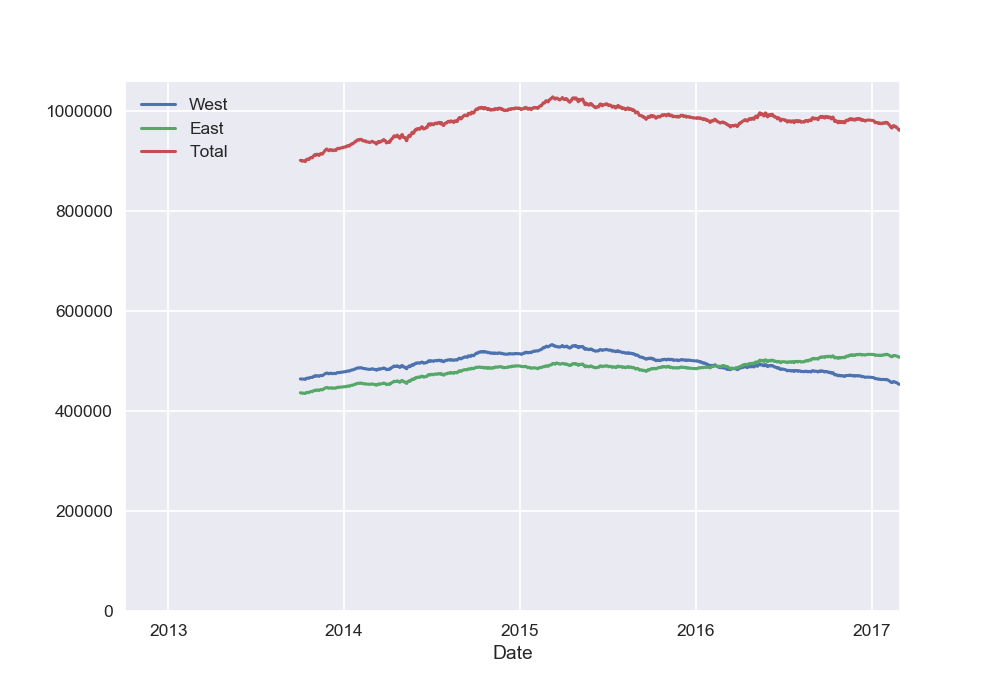

In [24]:
df['Total'] = df['East'] + df['West']
ax = df.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None);

<IPython.core.display.Javascript object>


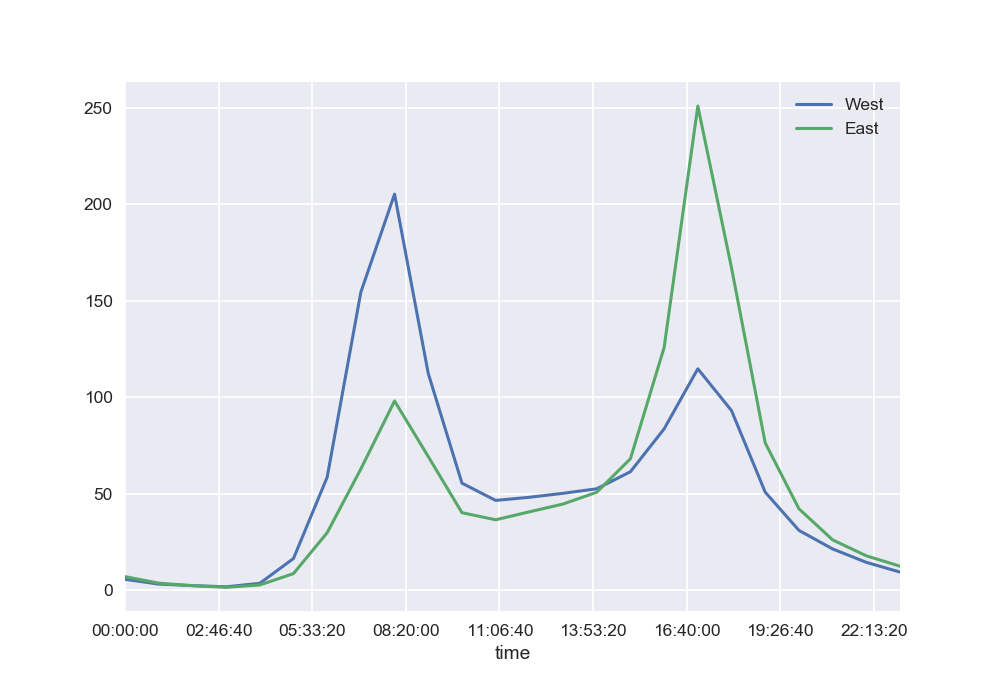

In [23]:
df.groupby(df.index.time).mean().plot()

In [30]:
pivoted = df.pivot_table('Total', index=df.index.time,columns=df.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


<IPython.core.display.Javascript object>


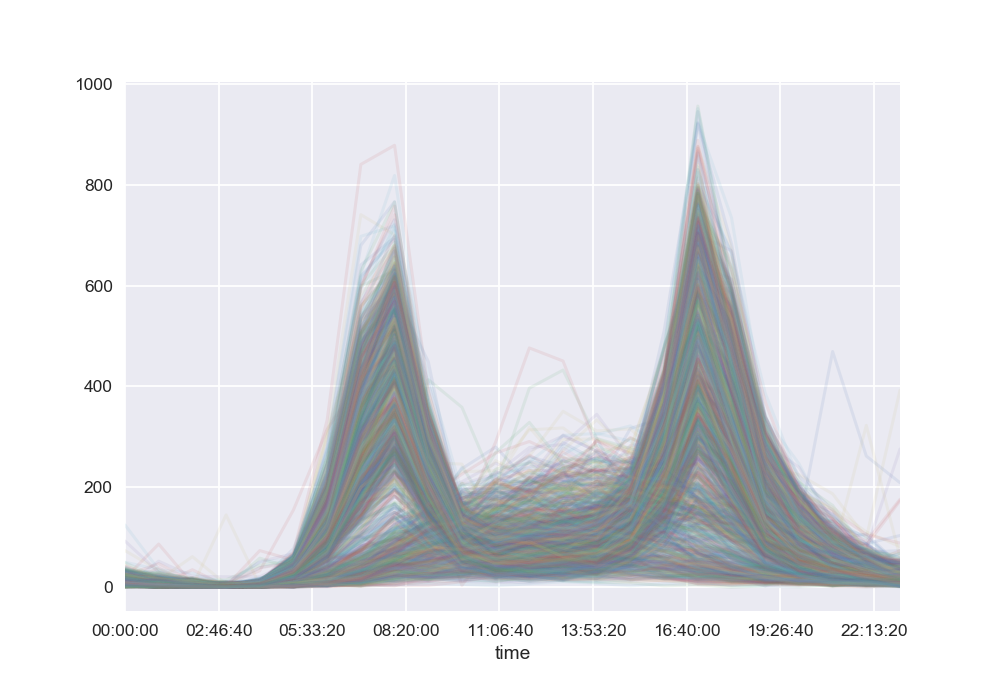

In [33]:
pivoted.plot(legend=False, alpha=0.1)